<a href="https://colab.research.google.com/github/BrillaM/biostat-212b-2024-spring/blob/main/212B_Project_Plan_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Library imports
import numpy as np # for vector / matrix operations
import pandas as pd # for data manipulation
from matplotlib import pyplot # for basic plots
import seaborn as sns # for advanced plots
import xgboost as xgb # for xgboost

#Load the data from csv file

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir="/content/drive/Mydrive/"
indir = '/content/drive/MyDrive/212Bdataset/'
infile = indir + 'Mental_Health_Dataset.csv'

Mounted at /content/drive


In [ ]:
data = pd.read_csv(infile)

#*drop* NA values, duplicates and care options

In [ ]:
# Remove NaN values in place in 'data'
data.dropna(inplace=True)

# Drop 'care_options' column and reassign the DataFrame to 'df'
df = data.drop(columns=['care_options'])

#drop duplicates
df=df.drop_duplicates()

# Now when you check the head of 'df', it should not have 'care_options' or 'Timestamp' columns
df.head()



,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No


In [ ]:
print(df['Gender'].value_counts())

Gender
Male      232050
Female     50858
Name: count, dtype: int64


In [ ]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No


In [ ]:
df.dtypes


Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
dtype: object

In [ ]:
print(df['Country'].value_counts())

Country
United States             163919
United Kingdom             50576
Canada                     17529
Australia                   6014
Netherlands                 5891
Ireland                     5542
Germany                     4680
Sweden                      2812
India                       2771
France                      2340
Brazil                      2340
New Zealand                 1991
South Africa                1991
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      821
Poland                       821
Russia                       780
Denmark                      780
Singapore                    780
Greece                       780
Czech Republic               390
Georgia                      390
Colombia                     390
Moldova                      390
Mexico                       390
Croatia                      390
Thailand                     390
Nigeria                      390
Bo

#EDA

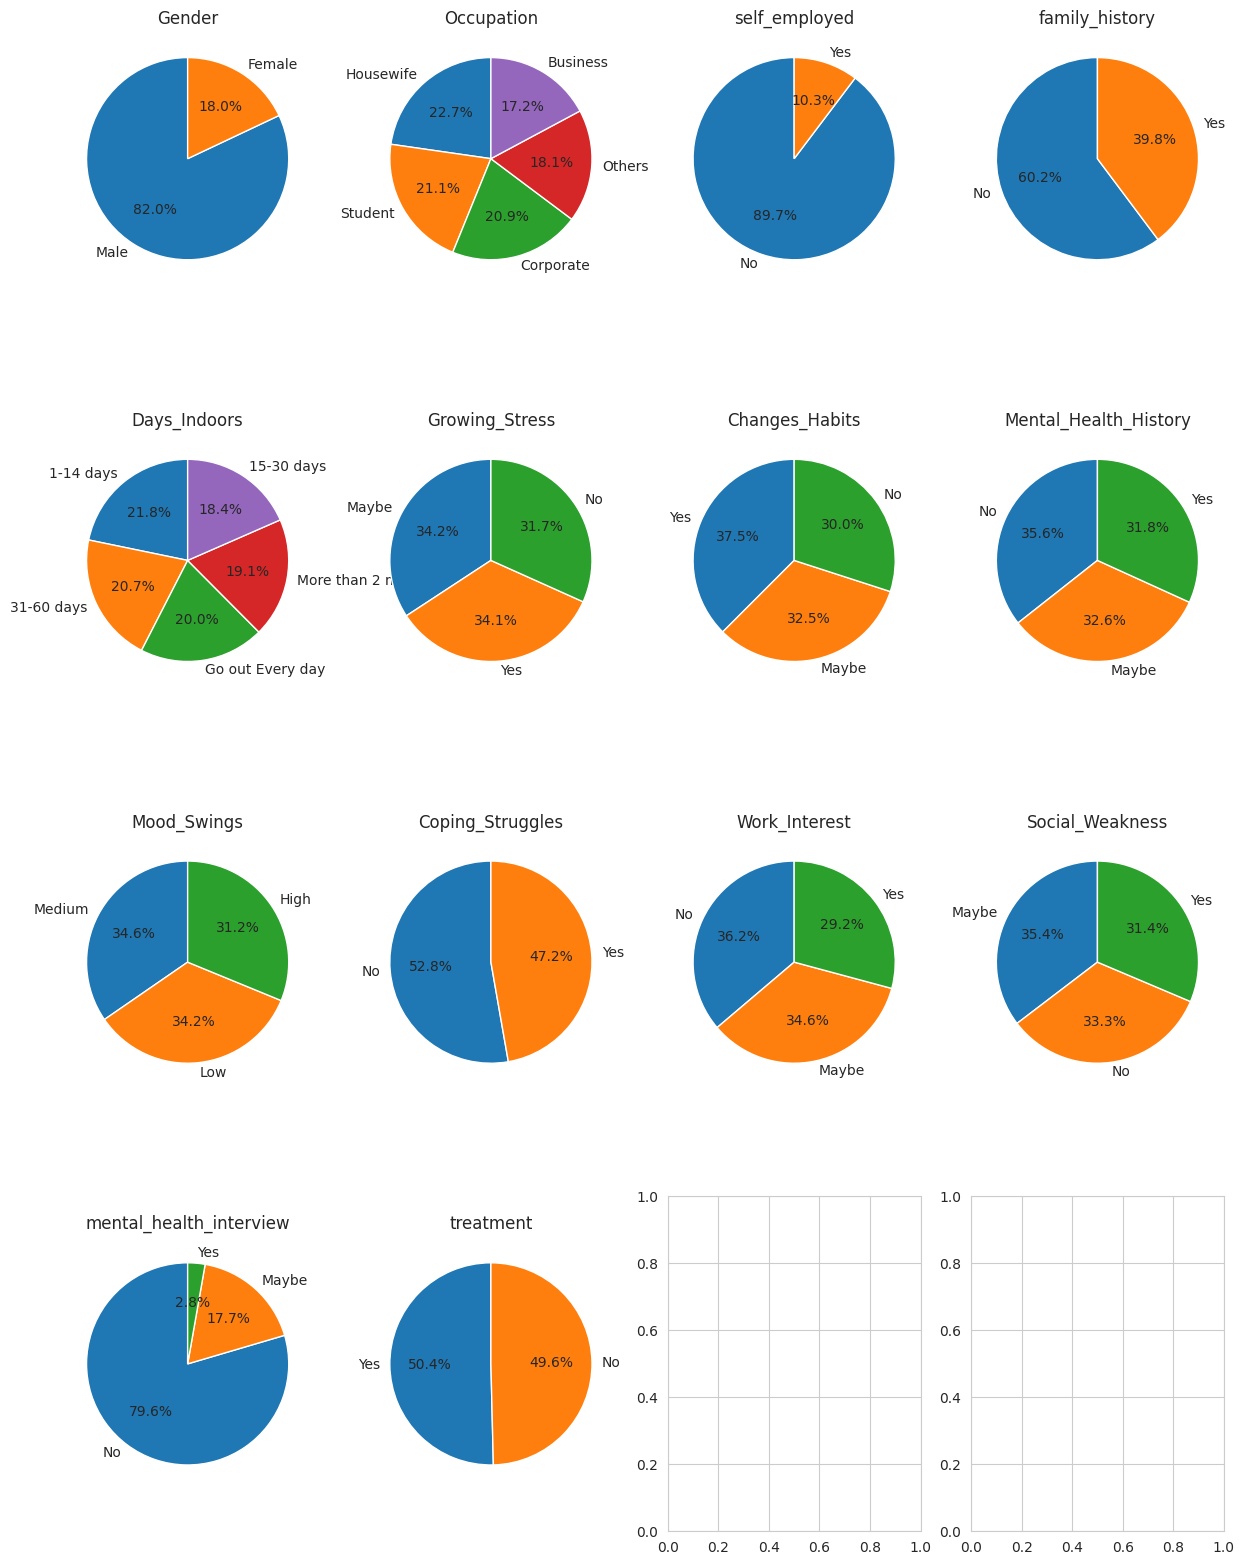

In [ ]:
sns.set_style("whitegrid")

cols_to_visualize = ['Gender',
                     'Occupation',
                     'self_employed',
                     'family_history',
                     'Days_Indoors',
                     'Growing_Stress',
                     'Changes_Habits',
                     'Mental_Health_History',
                     'Mood_Swings',
                     'Coping_Struggles',
                     'Work_Interest',
                     'Social_Weakness',
                     'mental_health_interview',
                     'treatment']
counts = []

for col in cols_to_visualize:
    counts.append(df[col].value_counts())

fig, axs = pyplot.subplots(4, 4, figsize=(15, 20))
axs = axs.flatten()

for i, (col, count) in enumerate(zip(cols_to_visualize, counts)):
    axs[i].pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(col)


pyplot.show()

<ipython-input-11-54173b1157a0>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(data = df, x="treatment", alpha=.5, palette="muted")


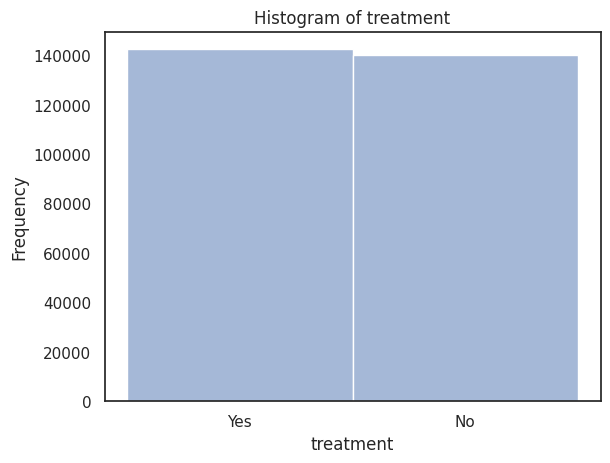

In [ ]:
sns.set_theme(style="white")
# Histogram by groups
histplot = sns.histplot(data = df, x="treatment", alpha=.5, palette="muted")
histplot.set( ylabel='Frequency', xlabel='treatment',
           title= 'Histogram of treatment')
pyplot.show()

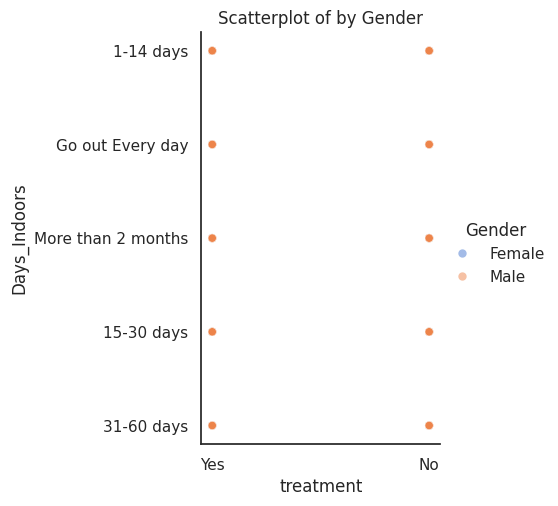

In [ ]:
scplot = sns.relplot(data = df, x="treatment", y="Days_Indoors",
                     hue="Gender",  alpha=.5, palette="muted")
scplot.set( ylabel='Days_Indoors', xlabel='treatment',
           title= 'Scatterplot of by Gender')
pyplot.show()

In [ ]:
mh_df=df.copy(deep=True)
mh_df['Timestamp'] = pd.to_datetime(df['Timestamp'])

mh_df['Date'] = mh_df['Timestamp'].dt.date
mh_df['Time_Of_Day'] = mh_df['Timestamp'].dt.time

#And for month day and year
mh_df['Day'] = mh_df['Timestamp'].dt.day
mh_df['Month'] = mh_df['Timestamp'].dt.month
mh_df['Year'] = mh_df['Timestamp'].dt.year

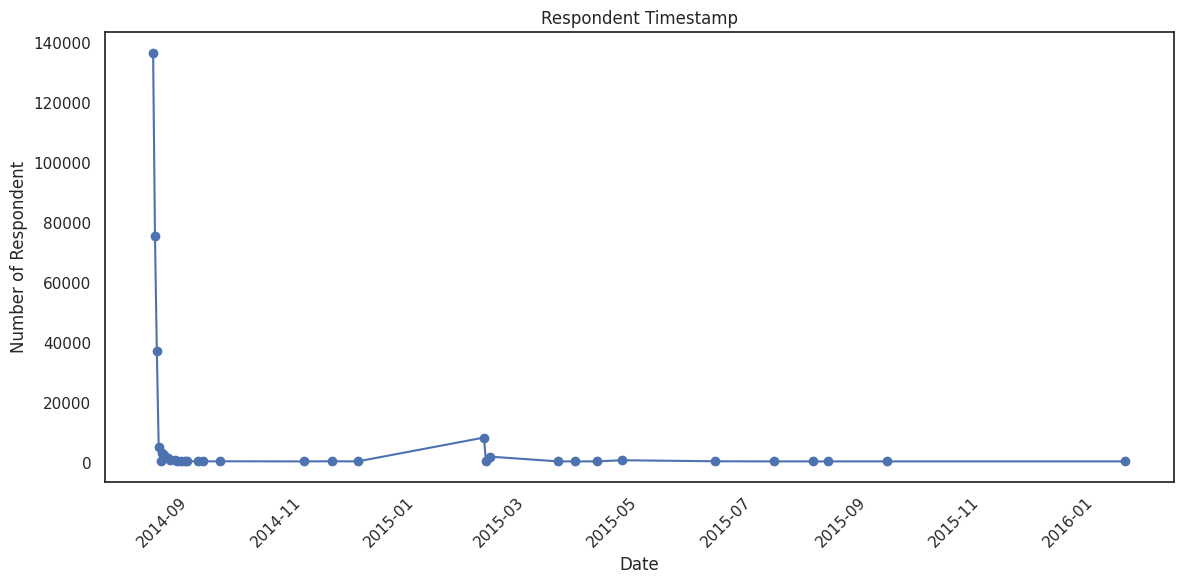

In [ ]:
daily_counts = mh_df.groupby(mh_df['Date']).size()
daily_counts.head()

pyplot.figure(figsize=(12, 6))
pyplot.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')
pyplot.title('Respondent Timestamp')
pyplot.xlabel('Date')
pyplot.ylabel('Number of Respondent')
pyplot.xticks(rotation=45)
pyplot.tight_layout()
pyplot.show()

In [ ]:
from matplotlib import pyplot # for basic plots
import seaborn as sns # for advanced plots


In [ ]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No


Since pairplot need the data to be numberic, so didn't use  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


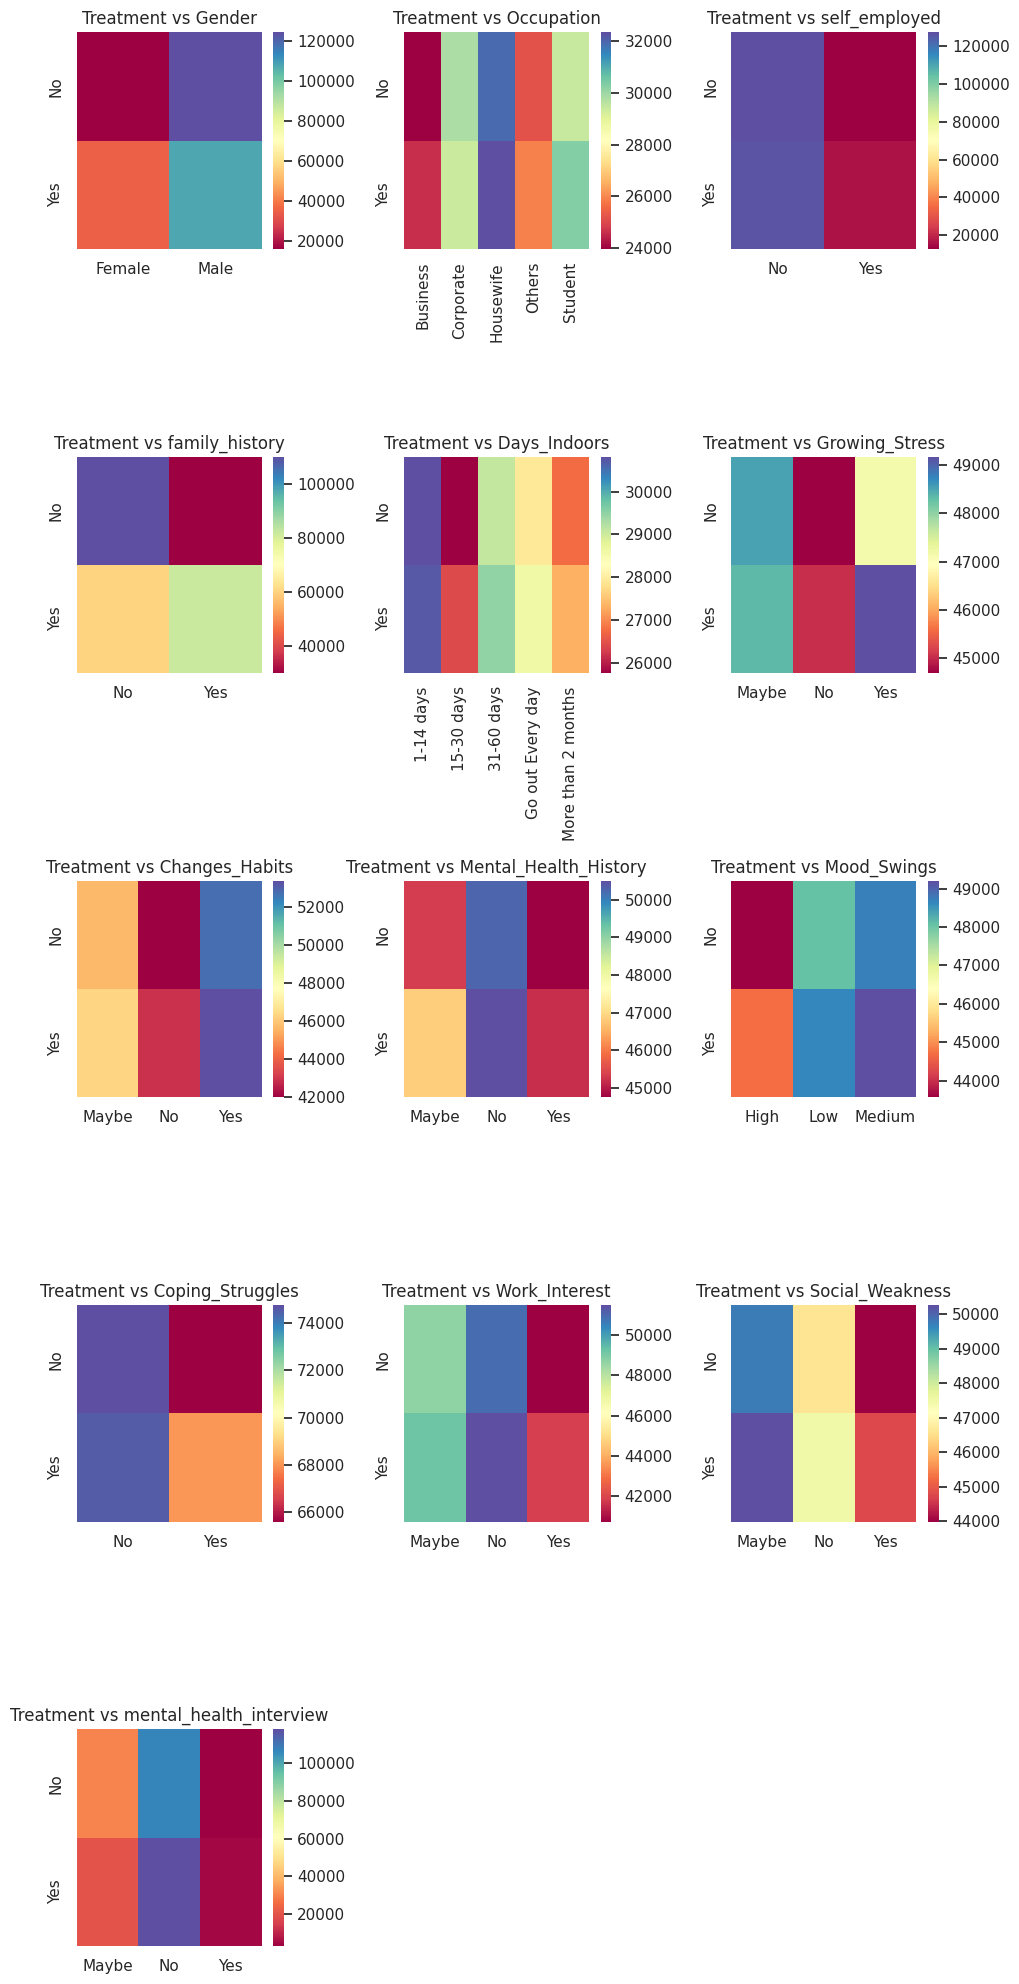

In [ ]:
import matplotlib.pyplot as plt  # This line is important to define 'plt'
import seaborn as sns
import pandas as pd

# Your set style
sns.set_style("whitegrid")

# Define the list of variables you want to compare with 'treatment'
variables = [
    'Gender', 'Occupation', 'self_employed', 'family_history',
    'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
    'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
    'mental_health_interview'
]

# Assuming 'df' is your DataFrame and it's already been defined and contains the relevant data

# Create a subplot grid: we will have 13 heatmaps, so you can arrange them in a grid that suits your preference
fig, axs = plt.subplots(5, 3, figsize=(10, 20))  # Adjust as needed for your number of variables
axs = axs.flatten()  # Flatten the axis array for easy iteration

for i, var in enumerate(variables):
    # Create a crosstab for each variable against 'treatment'
    crosstab = pd.crosstab(df['treatment'], df[var])
    # Plot the heatmap in the ith subplot without annotations
    sns.heatmap(crosstab, ax=axs[i], annot=False, fmt="d", cmap="Spectral")
    # Set the title for each heatmap
    axs[i].set_title(f'Treatment vs {var}')
    # Set the labels
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')

# Turn off any unused subplots
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()






#Clean Data


In [ ]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No


In [ ]:
#drop Timestamp
df.drop(columns=['Timestamp'], inplace=True)

In [ ]:
df.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
3,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
4,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
5,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe
6,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No
7,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No


In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
le = LabelEncoder()

# Label encode all categorical columns except 'Timestamp'
categorical_columns = df.select_dtypes(include=['object'])
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])
df.head()


,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview
3,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0
4,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1
5,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0
6,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1
7,0,34,1,0,0,0,0,2,1,2,2,0,1,2,1


In [ ]:
df.count()

Gender                     282908
Country                    282908
Occupation                 282908
self_employed              282908
family_history             282908
treatment                  282908
Days_Indoors               282908
Growing_Stress             282908
Changes_Habits             282908
Mental_Health_History      282908
Mood_Swings                282908
Coping_Struggles           282908
Work_Interest              282908
Social_Weakness            282908
mental_health_interview    282908
dtype: int64

In [ ]:
df.dtypes

Gender                     int64
Country                    int64
Occupation                 int64
self_employed              int64
family_history             int64
treatment                  int64
Days_Indoors               int64
Growing_Stress             int64
Changes_Habits             int64
Mental_Health_History      int64
Mood_Swings                int64
Coping_Struggles           int64
Work_Interest              int64
Social_Weakness            int64
mental_health_interview    int64
dtype: object

# Logistic Regression Model


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.33, random_state = 42)

In [ ]:
print (f"Size of training set : {df_train.shape[0]} rows , {df_train.shape[1]} columns")
print (f"Size of test set : {df_test.shape[0]} rows , {df_test.shape[1]} columns")

Size of training set : 189548 rows , 15 columns
Size of test set : 93360 rows , 15 columns


In [ ]:
x_train = df_train.loc[:, df_train.columns != 'treatment']
y_train = df_train.treatment
x_test = df_test.loc[:, df_test.columns != 'treatment']
y_test = df_test.treatment

In [ ]:
y_train.head(3)

84348     1
226722    0
11163     0
Name: treatment, dtype: int64

In [ ]:
# Initialize the logistic regression model object
LRmodel = LogisticRegression(solver='liblinear')
# Train it with training data
LRmodel.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Predict Y values of training data
y_train_pred = LRmodel.predict(x_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
target_names = ['without treatment', 'with treatment']
print(classification_report(y_train, y_train_pred, target_names=target_names))

                   precision    recall  f1-score   support

without treatment       0.67      0.73      0.70     94156
   with treatment       0.71      0.64      0.67     95392

         accuracy                           0.69    189548
        macro avg       0.69      0.69      0.68    189548
     weighted avg       0.69      0.69      0.68    189548



In [ ]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_treatment', 'predicted_treatment']
cnf_matrix.index = ['true_no_treatment', 'true_treatment']
cnf_matrix

,predicted_no_treatment,predicted_treatment
true_no_treatment,68739,25417
true_treatment,34207,61185


In [ ]:
# Predict Y values of training data
y_test_pred = LRmodel.predict(x_test)
target_names = ['without treatment', 'with treatment']
print('\n------------\n'+
      'Classification report on test data' +
      '\n------------\n')
print(classification_report(y_test, y_test_pred, target_names=target_names))

#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_treatment', 'predicted_treatment']
cnf_matrix.index = ['true_no_treatment', 'true_treatment']

print('\n------------\n'+
      'Confusion matrix on test data' +
      '\n------------\n')

print(cnf_matrix)


------------
Classification report on test data
------------

                   precision    recall  f1-score   support

without treatment       0.66      0.73      0.70     46201
   with treatment       0.71      0.64      0.67     47159

         accuracy                           0.68     93360
        macro avg       0.69      0.68      0.68     93360
     weighted avg       0.69      0.68      0.68     93360


------------
Confusion matrix on test data
------------

                   predicted_no_treatment  predicted_treatment
true_no_treatment                   33734                12467
true_treatment                      17036                30123


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:

# predict probabilities
y_train_prob = LRmodel.predict_proba(x_train)
y_train_prob = y_train_prob[:,1]

# calculate false positive and true positive rates
# these numbers are used to plot roc curve
fpr, tpr, _ = roc_curve(y_train, y_train_prob)
# calculate roc auc
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, y_train_prob)

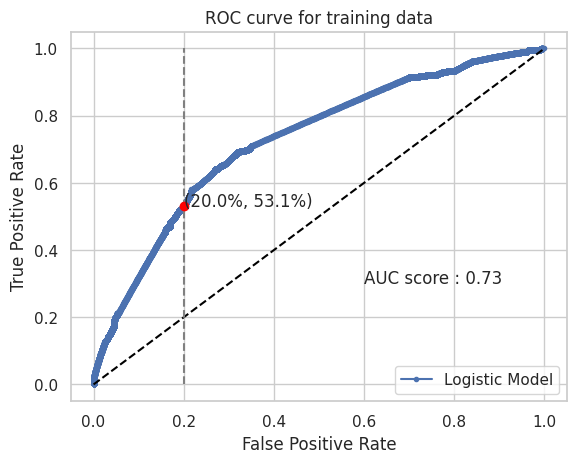

In [ ]:
from matplotlib import pyplot

# plot model roc curve on test data
pyplot.plot(fpr, tpr, marker='.', label='Logistic Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [0,1], linestyle='--', color='black' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_bench = 0.2
pyplot.plot([fpr_bench,fpr_bench], [0,1], linestyle='--', color='grey' )
# find highest TPR for 20% FPR
max_tpr = max(tpr[fpr<=0.2])
pyplot.plot([fpr_bench], [max_tpr], marker = 'o',color='red' )
anno_str = "(" + str(np.round(fpr_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_tpr*100 ,1)) + \
          "%)"
pyplot.text(fpr_bench, max_tpr, anno_str)

# Report AUC score
auc_str = "AUC score : " + str(np.round(roc_auc_train, 2))
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

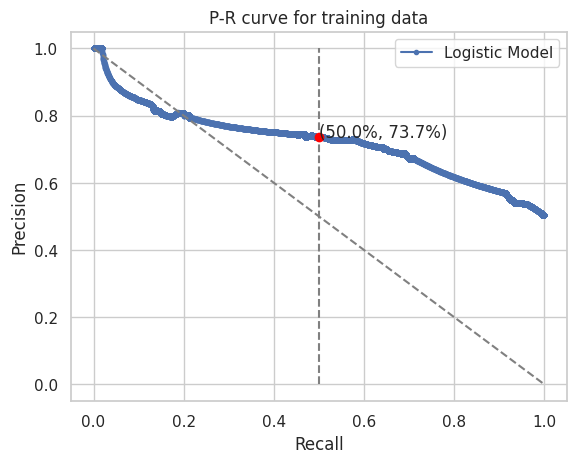

In [ ]:
# plot precision-recall curve on test data
pyplot.plot(recall, precision, marker='.', label='Logistic Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision we can get if we want recall to be 50% of higher
recall_bench = 0.5
pyplot.plot([recall_bench, recall_bench], [0,1], linestyle='--', color='grey' )

# find highest TPR for 20% FPR
max_prec = max(precision[recall>=recall_bench])
pyplot.plot([recall_bench], [max_prec], marker = 'o',color='red' )
anno_str = "(" + str(np.round(recall_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_prec*100 ,1)) + \
          "%)"
pyplot.text(recall_bench, max_prec, anno_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('P-R curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
dict_eval = {}
for dset in ['train', 'test']:
  # predict probabilities
  if (dset=='train'):
      x,y = x_train, y_train
  else:
      x,y = x_test, y_test

  y_prob = LRmodel.predict_proba(x)
  y_prob = y_prob[:, 1]

  # calculate false positive and true positive rates
  # these numbers are used to plot roc curve
  fpr, tpr, _ = roc_curve(y, y_prob)
  # calculate roc auc
  roc_auc = roc_auc_score(y, y_prob)

  # calculate precision-recall curve
  precision, recall, _ = precision_recall_curve(y, y_prob)
  pr_auc = average_precision_score(y, y_prob)

  dict_eval[dset] = {'fpr':fpr, 'tpr':tpr, 'roc_auc':roc_auc,
                     'prec':precision, 'recall':recall, 'pr_auc':pr_auc
                     }

Text(0.5, 1.0, 'ROC curve for training and test data')

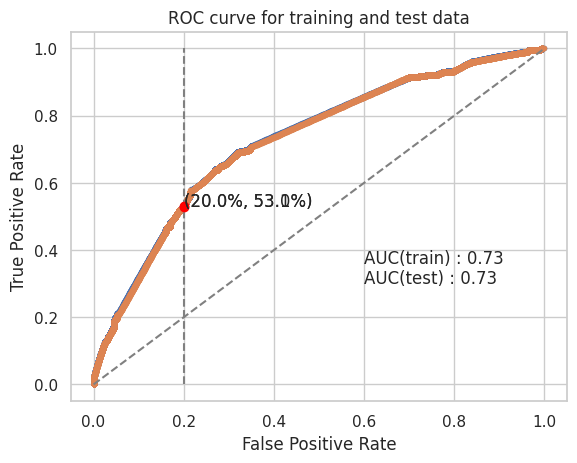

In [ ]:
# plot model roc curve on test data
pyplot.plot(dict_eval['train']['fpr'], dict_eval['train']['tpr'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['fpr'], dict_eval['test']['tpr'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [0,1], linestyle='--', color='grey' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_thresh = 0.2
pyplot.plot([fpr_thresh,fpr_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_tpr = max(dict_eval[dset]['tpr'][dict_eval[dset]['fpr'] <= fpr_thresh])
  pyplot.plot([fpr_thresh], [max_tpr], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(fpr_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_tpr*100 ,1)) + \
            "%)"
  pyplot.text(fpr_thresh, max_tpr, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['roc_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training and test data')

Text(0.5, 1.0, 'PR curve for training and test data')

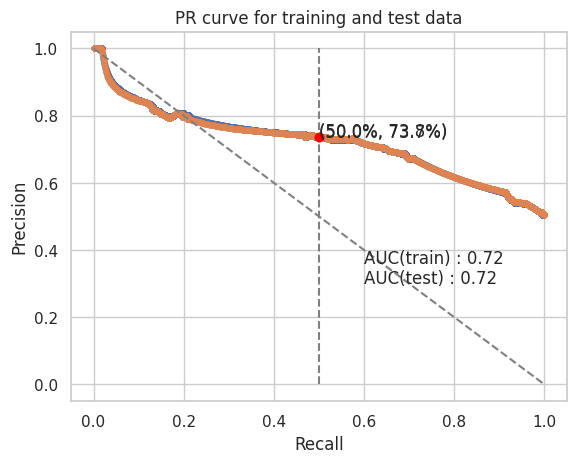

In [ ]:
# compare PR curve on train vs test data
pyplot.plot(dict_eval['train']['recall'], dict_eval['train']['prec'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['recall'], dict_eval['test']['prec'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision for recall >= 50%
recall_thresh = 0.5
pyplot.plot([recall_thresh,recall_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_prec = max(dict_eval[dset]['prec'][dict_eval[dset]['recall'] >= recall_thresh])
  pyplot.plot([recall_thresh], [max_prec], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(recall_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_prec*100 ,1)) + \
            "%)"
  pyplot.text(recall_thresh, max_prec, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['pr_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('PR curve for training and test data')

# Decision Tree model


In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.33, random_state = 42)

In [ ]:
print (f"Size of training set : {df_train.shape[0]} rows , {df_train.shape[1]} columns")
print (f"Size of training set : {df_test.shape[0]} rows , {df_test.shape[1]} columns")

Size of training set : 189548 rows , 15 columns
Size of training set : 93360 rows , 15 columns


In [ ]:
x_train = df_train.loc[:, df_train.columns != 'treatment']
y_train = df_train.treatment
x_test = df_test.loc[:, df_test.columns != 'treatment']
y_test = df_test.treatment

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [ ]:

# Initialize the logistic regression model object
clf_tree = dtree(criterion='gini', max_depth=4, random_state=1)

# Train it with training data
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
y_train_pred = clf_tree.predict(x_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
target_names = ['without treatment', 'with treatment']
print(classification_report(y_train, y_train_pred, target_names=target_names))

                   precision    recall  f1-score   support

without treatment       0.67      0.74      0.70     94156
   with treatment       0.71      0.64      0.68     95392

         accuracy                           0.69    189548
        macro avg       0.69      0.69      0.69    189548
     weighted avg       0.69      0.69      0.69    189548



In [ ]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_treatment', 'predicted_treatment']
cnf_matrix.index = ['true_no_treatment', 'true_treatment']
cnf_matrix

,predicted_no_treatment,predicted_treatment
true_no_treatment,69549,24607
true_treatment,34161,61231


view the fitted tree model



In [ ]:
from sklearn import tree
from matplotlib import pyplot
from sklearn.tree import export_text

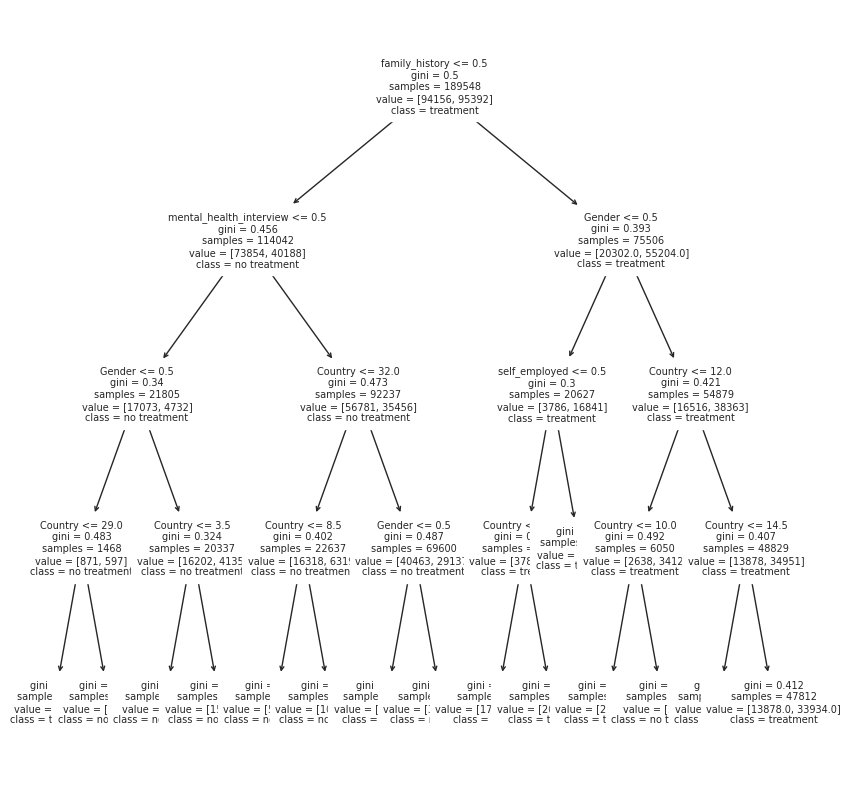

In [ ]:
feature_names = x_train.columns
class_names = ['no treatment', 'treatment']

# View thw tree model (this does not mention variable names)
fig, ax = pyplot.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, feature_names = feature_names, class_names=class_names,
               fontsize=7)
pyplot.show()

Model performance on test data


In [ ]:
# Predict Y values of trauining data
y_test_pred = clf_tree.predict(x_test)
target_names = ['without treatment', 'with treatment']
print('\n------------\n'+
      'Classification report on test data' +
      '\n------------\n')
print(classification_report(y_test, y_test_pred, target_names=target_names))

#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_treatment', 'predicted_treatment']
cnf_matrix.index = ['true_no_treatment', 'true_treatment']

print('\n------------\n'+
      'Confusion matrix on test data' +
      '\n------------\n')

print(cnf_matrix)


------------
Classification report on test data
------------

                   precision    recall  f1-score   support

without treatment       0.67      0.74      0.70     46201
   with treatment       0.71      0.64      0.67     47159

         accuracy                           0.69     93360
        macro avg       0.69      0.69      0.69     93360
     weighted avg       0.69      0.69      0.69     93360


------------
Confusion matrix on test data
------------

                   predicted_no_treatment  predicted_treatment
true_no_treatment                   34088                12113
true_treatment                      17011                30148


ROC, AUC

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:
# predict probabilities
y_train_prob = clf_tree.predict_proba(x_train)
y_train_prob = y_train_prob[:,1]

# calculate false positive and true positive rates
# these numbers are used to plot roc curve
fpr, tpr, _ = roc_curve(y_train, y_train_prob)
# calculate roc auc
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, y_train_prob)

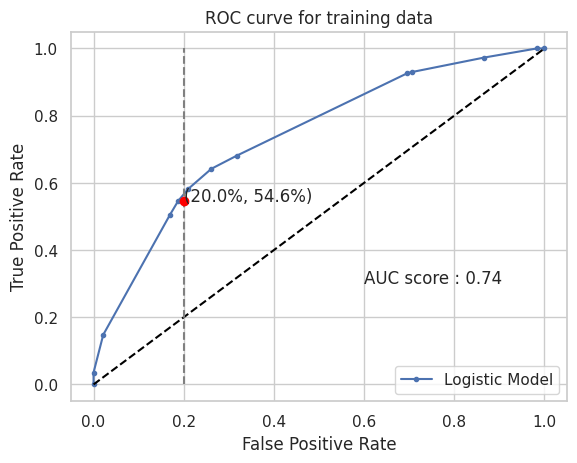

In [ ]:
from matplotlib import pyplot

# plot model roc curve on test data
pyplot.plot(fpr, tpr, marker='.', label='Logistic Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [0,1], linestyle='--', color='black' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_bench = 0.2
pyplot.plot([fpr_bench,fpr_bench], [0,1], linestyle='--', color='grey' )
# find highest TPR for 20% FPR
max_tpr = max(tpr[fpr<=0.2])
pyplot.plot([fpr_bench], [max_tpr], marker = 'o',color='red' )
anno_str = "(" + str(np.round(fpr_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_tpr*100 ,1)) + \
          "%)"
pyplot.text(fpr_bench, max_tpr, anno_str)

# Report AUC score
auc_str = "AUC score : " + str(np.round(roc_auc_train, 2))
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

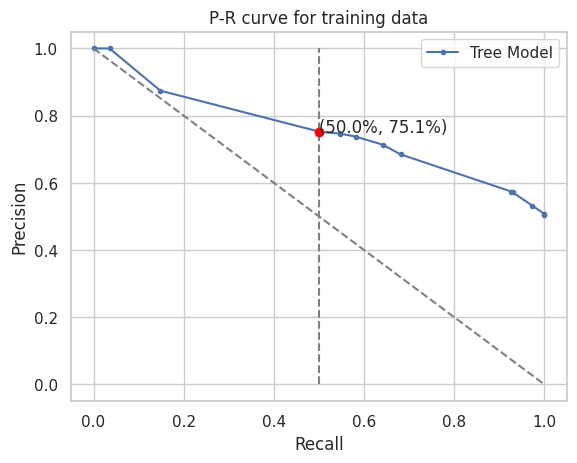

In [ ]:
# plot precision-recall curve on test data
pyplot.plot(recall, precision, marker='.', label='Tree Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision we can get if we want recall to be 50% of higher
recall_bench = 0.5
pyplot.plot([recall_bench, recall_bench], [0,1], linestyle='--', color='grey' )

# find highest TPR for 20% FPR
max_prec = max(precision[recall>=recall_bench])
pyplot.plot([recall_bench], [max_prec], marker = 'o',color='red' )
anno_str = "(" + str(np.round(recall_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_prec*100 ,1)) + \
          "%)"
pyplot.text(recall_bench, max_prec, anno_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('P-R curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Comparing the performance on test vs training data


In [ ]:
dict_eval = {}
for dset in ['train', 'test']:
  # predict probabilities
  if (dset=='train'):
      x,y = x_train, y_train
  else:
      x,y = x_test, y_test

  y_prob = clf_tree.predict_proba(x)
  y_prob = y_prob[:, 1]

  # calculate false positive and true positive rates
  # these numbers are used to plot roc curve
  fpr, tpr, _ = roc_curve(y, y_prob)
  # calculate roc auc
  roc_auc = roc_auc_score(y, y_prob)

  # calculate precision-recall curve
  precision, recall, _ = precision_recall_curve(y, y_prob)
  pr_auc = average_precision_score(y, y_prob)

  dict_eval[dset] = {'fpr':fpr, 'tpr':tpr, 'roc_auc':roc_auc,
                     'prec':precision, 'recall':recall, 'pr_auc':pr_auc
                     }


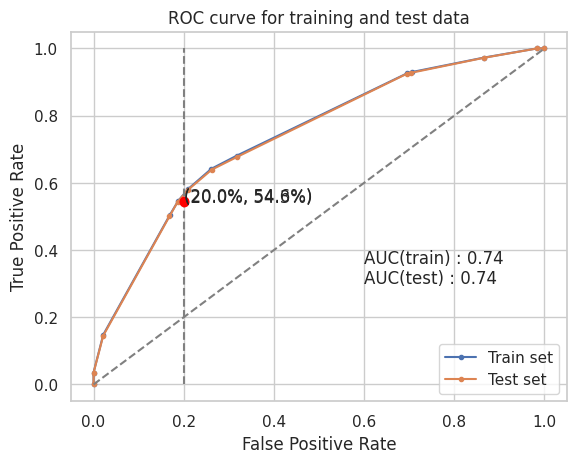

In [ ]:
# plot model roc curve on test data
pyplot.plot(dict_eval['train']['fpr'], dict_eval['train']['tpr'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['fpr'], dict_eval['test']['tpr'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [0,1], linestyle='--', color='grey' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_thresh = 0.2
pyplot.plot([fpr_thresh,fpr_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_tpr = max(dict_eval[dset]['tpr'][dict_eval[dset]['fpr'] <= fpr_thresh])
  pyplot.plot([fpr_thresh], [max_tpr], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(fpr_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_tpr*100 ,1)) + \
            "%)"
  pyplot.text(fpr_thresh, max_tpr, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['roc_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training and test data')
# show the legend
pyplot.legend()

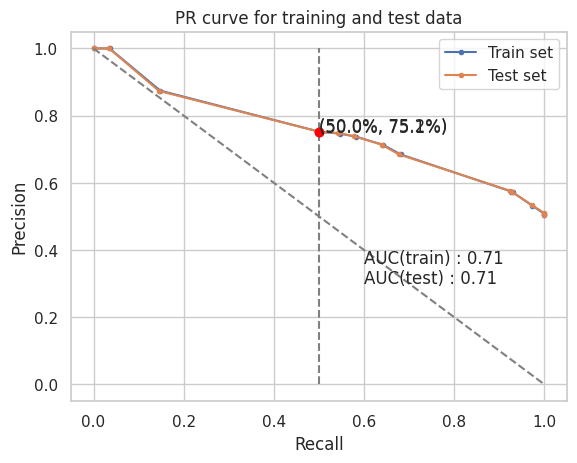

In [ ]:
# compare PR curve on train vs test data
pyplot.plot(dict_eval['train']['recall'], dict_eval['train']['prec'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['recall'], dict_eval['test']['prec'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision for recall >= 50%
recall_thresh = 0.5
pyplot.plot([recall_thresh,recall_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_prec = max(dict_eval[dset]['prec'][dict_eval[dset]['recall'] >= recall_thresh])
  pyplot.plot([recall_thresh], [max_prec], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(recall_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_prec*100 ,1)) + \
            "%)"
  pyplot.text(recall_thresh, max_prec, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['pr_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('PR curve for training and test data')
# show the legend
pyplot.legend()

# XGBoost Model



In [ ]:
import xgboost

In [ ]:
from xgboost import XGBClassifier as xgbclass
# Initialize the XGboost model object
xgb_model = xgbclass()
# Train it with training data
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predict Y values of trauining data
y_train_pred = xgb_model.predict(x_train)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
target_names = ['without treatment', 'with treatment']
print(classification_report(y_train, y_train_pred, target_names=target_names))

                   precision    recall  f1-score   support

without treatment       0.71      0.77      0.74     94156
   with treatment       0.75      0.69      0.72     95392

         accuracy                           0.73    189548
        macro avg       0.73      0.73      0.73    189548
     weighted avg       0.73      0.73      0.73    189548



In [ ]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_treatment', 'predicted_treatment']
cnf_matrix.index = ['true_no_treatment', 'true_treatment']
cnf_matrix

,predicted_no_treatment,predicted_treatment
true_no_treatment,72707,21449
true_treatment,29615,65777


In [ ]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
feature_names = x_train.columns
# Compute the variable importance
importances = xgb_model.feature_importances_
dict_importance = {k:np.round(v,3) for (k,v) in zip(feature_names, importances)}
# Print the variable importance
print(dict_importance)

{'Gender': 0.078, 'Country': 0.102, 'Occupation': 0.002, 'self_employed': 0.105, 'family_history': 0.615, 'Days_Indoors': 0.002, 'Growing_Stress': 0.002, 'Changes_Habits': 0.002, 'Mental_Health_History': 0.002, 'Mood_Swings': 0.002, 'Coping_Struggles': 0.002, 'Work_Interest': 0.002, 'Social_Weakness': 0.002, 'mental_health_interview': 0.085}


Text(0.5, 1.0, 'Feature Importance - Built-in Method')

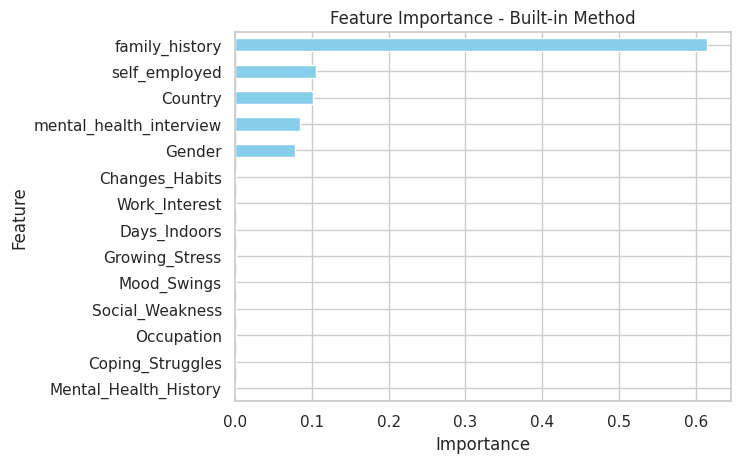

In [ ]:
from matplotlib import pyplot

# Simple plot of feature importance
feature_imp = pd.Series(xgb_model.feature_importances_, index=x_train.columns)
feature_imp.sort_values(ascending=True, inplace=True)
feature_imp.plot.barh(color='skyblue')
pyplot.xlabel("Importance")
pyplot.ylabel("Feature")
pyplot.title("Feature Importance - Built-in Method")

In [ ]:
# Predict Y values of trauining data
y_test_pred = xgb_model.predict(x_test)
target_names = ['without treatment', 'with treatment']
print('\n------------\n'+
      'Classification report on test data' +
      '\n------------\n')
print(classification_report(y_test, y_test_pred, target_names=target_names))

#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_treatment', 'predicted_treatment']
cnf_matrix.index = ['true_no_treatment', 'true_treatment']

print('\n------------\n'+
      'Confusion matrix on test data' +
      '\n------------\n')

print(cnf_matrix)


------------
Classification report on test data
------------

                   precision    recall  f1-score   support

without treatment       0.70      0.76      0.73     46201
   with treatment       0.74      0.68      0.71     47159

         accuracy                           0.72     93360
        macro avg       0.72      0.72      0.72     93360
     weighted avg       0.72      0.72      0.72     93360


------------
Confusion matrix on test data
------------

                   predicted_no_treatment  predicted_treatment
true_no_treatment                   35122                11079
true_treatment                      15247                31912


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:
# predict probabilities
y_train_prob = xgb_model.predict_proba(x_train)
y_train_prob = y_train_prob[:,1]

# calculate false positive and true positive rates
# these numbers are used to plot roc curve
fpr, tpr, _ = roc_curve(y_train, y_train_prob)
# calculate roc auc
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, y_train_prob)

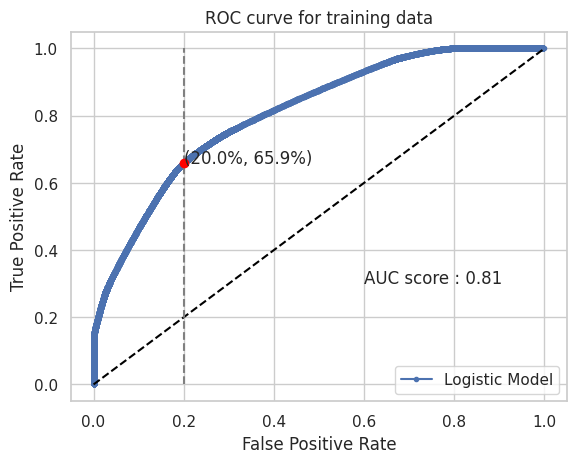

In [ ]:
from matplotlib import pyplot

# plot model roc curve on test data
pyplot.plot(fpr, tpr, marker='.', label='Logistic Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [0,1], linestyle='--', color='black' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_bench = 0.2
pyplot.plot([fpr_bench,fpr_bench], [0,1], linestyle='--', color='grey' )
# find highest TPR for 20% FPR
max_tpr = max(tpr[fpr<=0.2])
pyplot.plot([fpr_bench], [max_tpr], marker = 'o',color='red' )
anno_str = "(" + str(np.round(fpr_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_tpr*100 ,1)) + \
          "%)"
pyplot.text(fpr_bench, max_tpr, anno_str)

# Report AUC score
auc_str = "AUC score : " + str(np.round(roc_auc_train, 2))
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

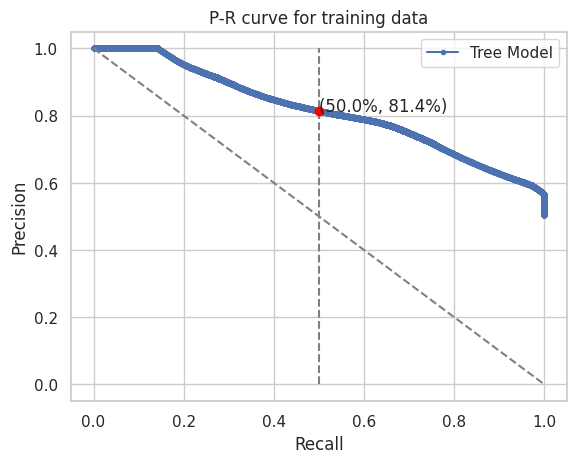

In [ ]:
# plot precision-recall curve on test data
pyplot.plot(recall, precision, marker='.', label='Tree Model')
# red dashed line is y=x line.
# larger the gap between this line and ROC curve, better is the model
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision we can get if we want recall to be 50% of higher
recall_bench = 0.5
pyplot.plot([recall_bench, recall_bench], [0,1], linestyle='--', color='grey' )

# find highest TPR for 20% FPR
max_prec = max(precision[recall>=recall_bench])
pyplot.plot([recall_bench], [max_prec], marker = 'o',color='red' )
anno_str = "(" + str(np.round(recall_bench*100, 0)) + \
          "%, " + \
          str(np.round(max_prec*100 ,1)) + \
          "%)"
pyplot.text(recall_bench, max_prec, anno_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('P-R curve for training data')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
dict_eval = {}
for dset in ['train', 'test']:
  # predict probabilities
  if (dset=='train'):
      x,y = x_train, y_train
  else:
      x,y = x_test, y_test

  y_prob = xgb_model.predict_proba(x)
  y_prob = y_prob[:, 1]

  # calculate false positive and true positive rates
  # these numbers are used to plot roc curve
  fpr, tpr, _ = roc_curve(y, y_prob)
  # calculate roc auc
  roc_auc = roc_auc_score(y, y_prob)

  # calculate precision-recall curve
  precision, recall, _ = precision_recall_curve(y, y_prob)
  pr_auc = average_precision_score(y, y_prob)

  dict_eval[dset] = {'fpr':fpr, 'tpr':tpr, 'roc_auc':roc_auc,
                     'prec':precision, 'recall':recall, 'pr_auc':pr_auc
                     }

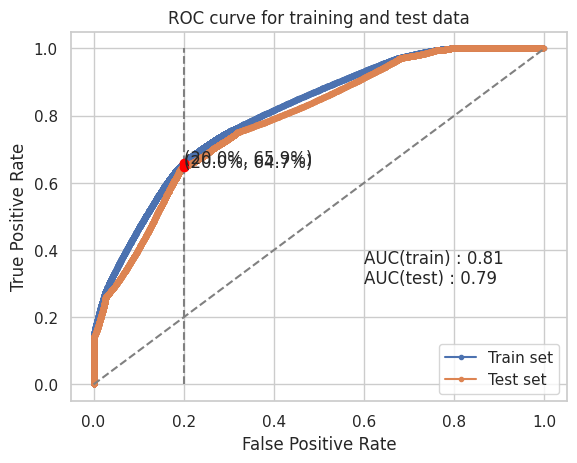

In [ ]:
# plot model roc curve on test data
pyplot.plot(dict_eval['train']['fpr'], dict_eval['train']['tpr'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['fpr'], dict_eval['test']['tpr'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [0,1], linestyle='--', color='grey' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_thresh = 0.2
pyplot.plot([fpr_thresh,fpr_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_tpr = max(dict_eval[dset]['tpr'][dict_eval[dset]['fpr'] <= fpr_thresh])
  pyplot.plot([fpr_thresh], [max_tpr], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(fpr_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_tpr*100 ,1)) + \
            "%)"
  pyplot.text(fpr_thresh, max_tpr, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['roc_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training and test data')
# show the legend
pyplot.legend()

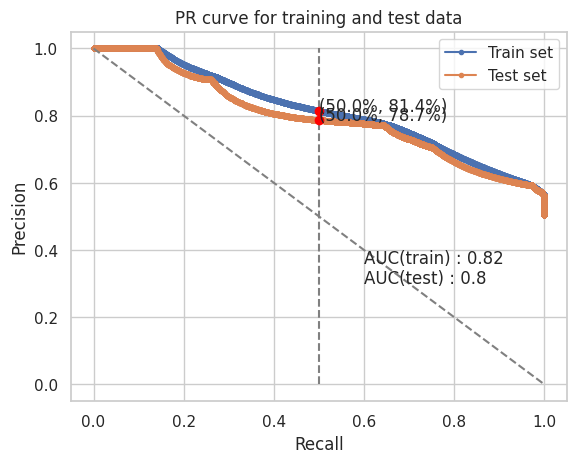

In [ ]:
# compare PR curve on train vs test data
pyplot.plot(dict_eval['train']['recall'], dict_eval['train']['prec'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['recall'], dict_eval['test']['prec'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [1,0], linestyle='--', color='grey' )

# Highest precision for recall >= 50%
recall_thresh = 0.5
pyplot.plot([recall_thresh,recall_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_prec = max(dict_eval[dset]['prec'][dict_eval[dset]['recall'] >= recall_thresh])
  pyplot.plot([recall_thresh], [max_prec], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(recall_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_prec*100 ,1)) + \
            "%)"
  pyplot.text(recall_thresh, max_prec, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['pr_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('PR curve for training and test data')
# show the legend
pyplot.legend()

In [ ]:
# Hyper parameter tuning
# Split trainng data furtehr into train and validation set
# fit model on traiing set and evaluate model on validation set

df_train01, df_valid = train_test_split(df_train, test_size=0.2, random_state = 42)

x_train01 = df_train01.loc[:, df_train01.columns != 'treatment']
y_train01 = df_train01.treatment
x_valid = df_valid.loc[:, df_valid.columns != 'treatment']
y_valid = df_valid.treatment

print(f'Training set size : {df_train.shape}, \nValidation set size : {df_valid.shape}')

Training set size : (189548, 15), 
Validation set size : (37910, 15)


In [ ]:
from sklearn.metrics import accuracy_score

# we will vary subsample, % of training observations to be sampled in each iteration  (default=1)
# we will vary reg_lambda, L2 regularization parameter (default=1)
# we will vary reg_alpha, L1 regularization parameter (default=0)

#param_values = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_values = [0, 1, 5,10, 11, 12, 13,14, 15, 20]

validation_acc = []
for param_value in param_values:
  #Initialize model
  #xgb_model01 = xgbclass(subsample = param_value)
  xgb_model01 = xgbclass(reg_lambda = param_value)
  # Fit model
  xgb_model01.fit(x_train01, y_train01)
  # Predict on validation set
  y_pred01 = xgb_model01.predict(x_valid)
  predictions = [round(value) for value in y_pred01]
  accuracy = accuracy_score(y_valid, predictions) * 100.0
  accuracy = np.round(accuracy, 2)
  print(f"Parameter: {param_value} , validation set accuracy: {accuracy}%")
  validation_acc.append(accuracy)

k = np.argmax(validation_acc)
best_param_val = param_values[k]
print(f'\nBest validation accuracy of {validation_acc[k]}% obtained for parameter value {best_param_val}')

Parameter: 0 , validation set accuracy: 71.66%
Parameter: 1 , validation set accuracy: 71.72%
Parameter: 5 , validation set accuracy: 71.83%
Parameter: 10 , validation set accuracy: 71.92%
Parameter: 11 , validation set accuracy: 72.03%
Parameter: 12 , validation set accuracy: 71.92%
Parameter: 13 , validation set accuracy: 72.09%
Parameter: 14 , validation set accuracy: 72.01%
Parameter: 15 , validation set accuracy: 72.02%
Parameter: 20 , validation set accuracy: 72.05%

Best validation accuracy of 72.09% obtained for parameter value 13


In [ ]:
# Fit the tuned model
xgb_model_tuned = xgbclass(reg_alpha = best_param_val)
# Train it with training data
xgb_model_tuned.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
dict_eval = {}
for dset in ['train', 'test']:
  # predict probabilities
  if (dset=='train'):
      x,y = x_train, y_train
  else:
      x,y = x_test, y_test

  y_prob = xgb_model_tuned.predict_proba(x)
  y_prob = y_prob[:, 1]

  # calculate false positive and true positive rates
  # these numbers are used to plot roc curve
  fpr, tpr, _ = roc_curve(y, y_prob)
  # calculate roc auc
  roc_auc = roc_auc_score(y, y_prob)

  # calculate precision-recall curve
  precision, recall, _ = precision_recall_curve(y, y_prob)
  pr_auc = average_precision_score(y, y_prob)

  dict_eval[dset] = {'fpr':fpr, 'tpr':tpr, 'roc_auc':roc_auc,
                     'prec':precision, 'recall':recall, 'pr_auc':pr_auc
                     }

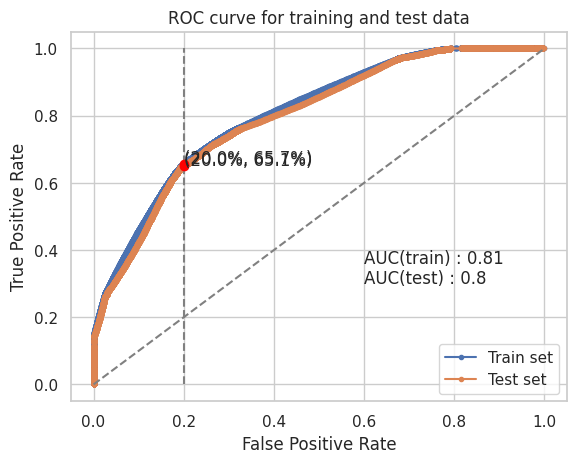

In [ ]:
# plot model roc curve on test data
pyplot.plot(dict_eval['train']['fpr'], dict_eval['train']['tpr'],
            marker='.', label='Train set')
pyplot.plot(dict_eval['test']['fpr'], dict_eval['test']['tpr'],
            marker='.', label='Test set')

# y=x line.
pyplot.plot([0,1], [0,1], linestyle='--', color='grey' )

# Highest TPR we can get if we are ready to tolerate 20% FPR
fpr_thresh = 0.2
pyplot.plot([fpr_thresh,fpr_thresh], [0,1], linestyle='--', color='grey' )
anno_list = {}

for dset in ['train', 'test']:
  # find highest TPR for 20% FPR
  max_tpr = max(dict_eval[dset]['tpr'][dict_eval[dset]['fpr'] <= fpr_thresh])
  pyplot.plot([fpr_thresh], [max_tpr], marker = 'o',color='red' )
  anno_str = "(" + str(np.round(fpr_thresh*100, 0)) + \
            "%, " + \
            str(np.round(max_tpr*100 ,1)) + \
            "%)"
  pyplot.text(fpr_thresh, max_tpr, anno_str)

  # Report AUC score
  auc_str = str(np.round(dict_eval[dset]['roc_auc'], 2))
  anno_list[dset] = "AUC("+ dset +") : " + auc_str

auc_str = anno_list['train'] + "\n" + anno_list['test']
pyplot.text(0.6, 0.3, auc_str)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for training and test data')
# show the legend
pyplot.legend()


# Emsemble

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
bagged_model = BaggingClassifier(LogisticRegression(solver='liblinear'),
                                 max_samples = 150, max_features = 5,
                                 bootstrap = True, bootstrap_features = True,
                                 oob_score = True,
                                 random_state = 42
                                 )

In [ ]:
# Fit the model on training data
bagged_model.fit(x_train,y_train)

BaggingClassifier(bootstrap_features=True,
                  estimator=LogisticRegression(solver='liblinear'),
                  max_features=5, max_samples=150, oob_score=True,
                  random_state=42)

In [ ]:
bagged_model.oob_score_

0.5193460231709118

In [ ]:
# Run the model on the test data

# Binary prediction from the model
y_test_pred = bagged_model.predict(x_test)

# predicted probabilities form the model
y_test_pred_prob = bagged_model.predict_proba(x_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
target_names = ['without treatment', 'with treatment']
print(classification_report(y_test, y_test_pred, target_names=target_names))

                   precision    recall  f1-score   support

without treatment       0.52      0.46      0.49     46201
   with treatment       0.52      0.58      0.55     47159

         accuracy                           0.52     93360
        macro avg       0.52      0.52      0.52     93360
     weighted avg       0.52      0.52      0.52     93360



In [ ]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_treatment', 'predicted_treatment']
cnf_matrix.index = ['true_no_treatment', 'true_treatment']
cnf_matrix

,predicted_no_treatment,predicted_treatment
true_no_treatment,21254,24947
true_treatment,19870,27289


Voting Classifiers

In [ ]:
from sklearn.ensemble import  VotingClassifier
from sklearn.naive_bayes import GaussianNB
# Linear Support vector machine for classification
from sklearn.svm import LinearSVC

In [ ]:
# Voting classifiers
clf_LR = LogisticRegression(random_state=1)
clf_GNB = GaussianNB()
clf_SVM = LinearSVC()

# Define the ensemble model
ensmb1 = VotingClassifier(estimators=[('lr', clf_LR),
                                     ('gnb', clf_GNB),
                                     ('svm', clf_SVM)],
                         voting='hard')

# Fit the ensemble model
ensmb1 = ensmb1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Binary prediction from the model
y_test_pred = ensmb1.predict(x_test)

# predicted probabilities form the model
#y_test_pred_prob = ensmb1.predict_proba(x_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['without treatment', 'with treatment']
print(classification_report(y_test, y_test_pred, target_names=target_names))

                   precision    recall  f1-score   support

without treatment       0.68      0.68      0.68     46201
   with treatment       0.69      0.68      0.68     47159

         accuracy                           0.68     93360
        macro avg       0.68      0.68      0.68     93360
     weighted avg       0.68      0.68      0.68     93360



In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_treatment', 'predicted_treatment']
cnf_matrix.index = ['true_no_treatment', 'true_treatment']
cnf_matrix

,predicted_no_treatment,predicted_treatment
true_no_treatment,31578,14623
true_treatment,15159,32000


#automation

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 M

In [ ]:
#!pip install pycaret
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
from pycaret import classification
# classification.setup() performs variaous preprocessing task on the data
# Arg1 : data = name of the dataframe
# Arg2 : target = name of the Y variable (aka claffication label)
classification_setup = classification.setup(data= df_train, target='treatment')

,Description,Value
0,Session id,3473
1,Target,treatment
2,Target type,Binary
3,Original data shape,"(189548, 15)"
4,Transformed data shape,"(189548, 15)"
5,Transformed train set shape,"(132683, 15)"
6,Transformed test set shape,"(56865, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Following one-line code fits 15 different models
# to the training data and reports out 6 model quality metrics
# For each model, best parameter choice is made using 10 fold CV
# At the end of the run, it highlights the best value of the metric
#classification.compare_models()

In [ ]:
model_xgb = classification.create_model('xgboost')
# Each row in the output table corresponds to
# results from one of the 10-fold cross validation
# The last two rows are mean and SD of the metrics,
# summarized over the 10 runs of the 10 fold CV

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7175,0.7928,0.6791,0.7385,0.7075,0.4352,0.4366
1,0.7210,0.7920,0.6839,0.7416,0.7116,0.4423,0.4436
2,0.7199,0.7942,0.6801,0.7418,0.7096,0.4400,0.4416
3,0.7226,0.7928,0.6843,0.7439,0.7128,0.4454,0.4469
4,0.7189,0.7906,0.6817,0.7394,0.7094,0.4382,0.4395
5,0.7184,0.7921,0.6856,0.7366,0.7102,0.4371,0.4381
6,0.7159,0.7893,0.6783,0.7363,0.7061,0.4320,0.4333
7,0.7284,0.8001,0.6958,0.7471,0.7205,0.4570,0.4581
8,0.7200,0.7925,0.6859,0.7389,0.7115,0.4402,0.4414


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# To have a look at the parameters of the Xgboost model
model_xgb

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

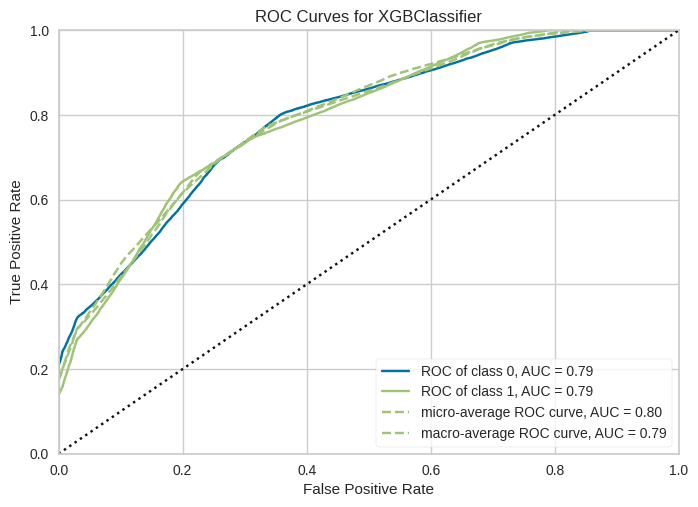

In [ ]:
#AUC-ROC plot
classification.plot_model(model_xgb, plot = 'auc')
#classification.plot_model(model_dt, plot = 'auc')

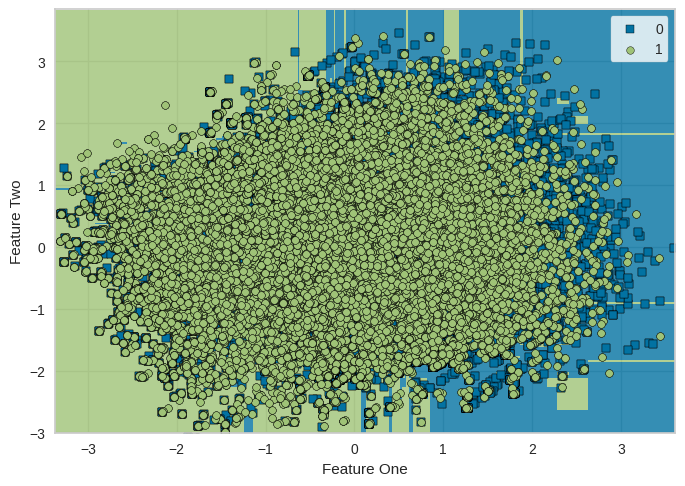

In [ ]:
#Decision boundary
classification.plot_model(model_xgb, plot = 'boundary')

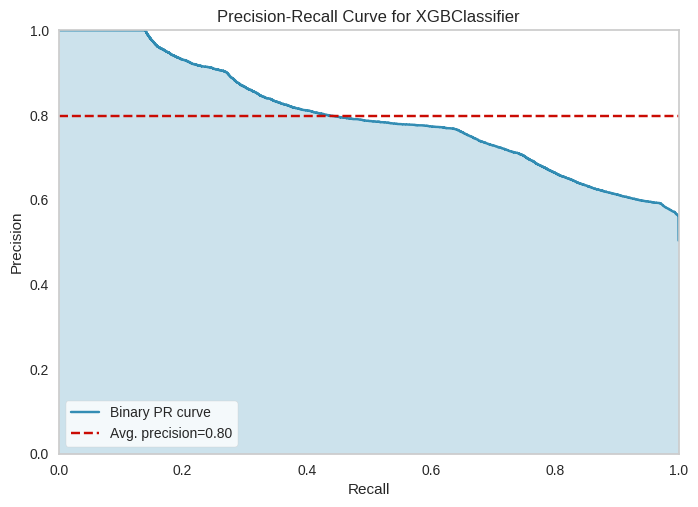

In [ ]:
#Precision-Recall curve
classification.plot_model(model_xgb, plot = 'pr')

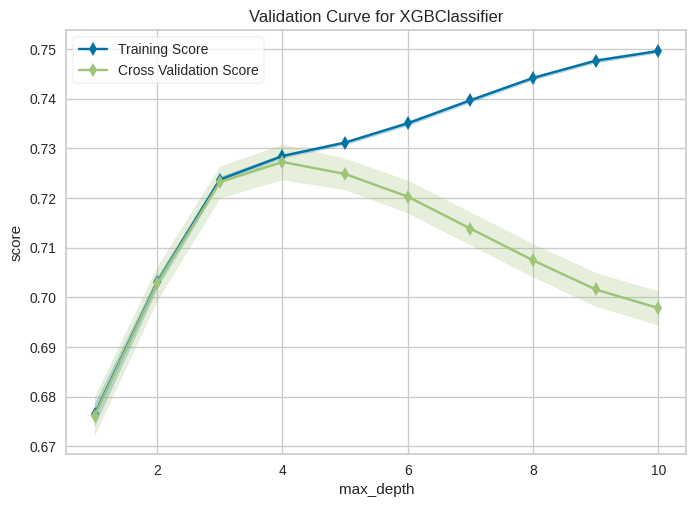

In [ ]:
#Validation Curve
classification.plot_model(model_xgb, plot = 'vc')

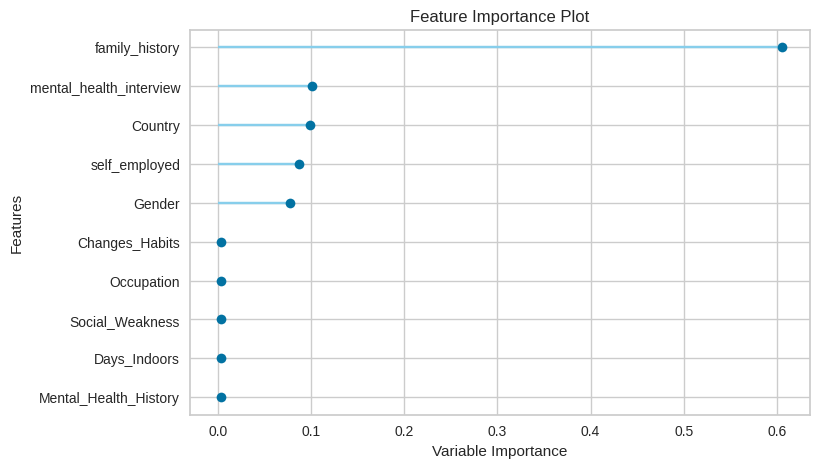

In [ ]:
#Feature importance plot
classification.plot_model(model_xgb, plot = 'feature')

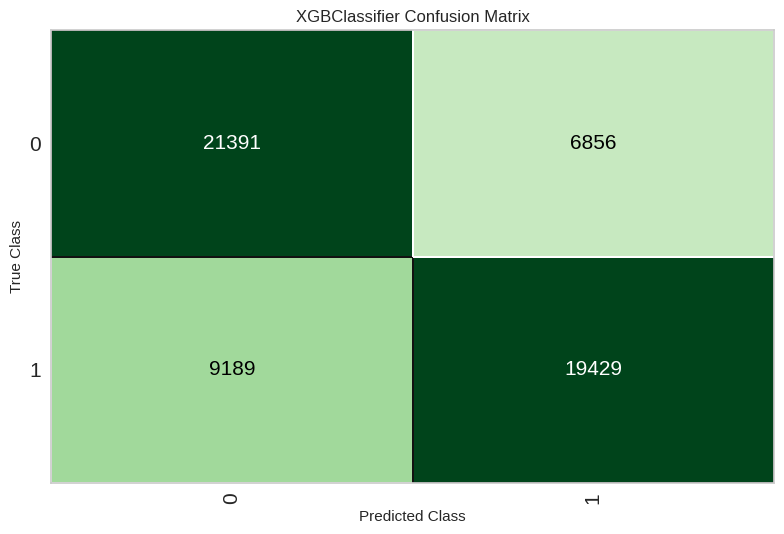

In [ ]:
#Confusion matrix
classification.plot_model(model_xgb, plot = 'confusion_matrix')

In [ ]:
#pip install pycaret[analysis]

In [ ]:
# Interpret model
#classification.interpret_model(model_xgb)
# For Xgb model, the plot produces (y= feature, X=Shapely value)

In [ ]:
# Predict using the fitted model
predictions = classification.predict_model(model_xgb, data=df_test)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7184,0.7910,0.6791,0.7417,0.7090,0.4373,0.4389


,Gender,Country,Occupation,self_employed,family_history,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,treatment,prediction_label,prediction_score
169701,1,33,1,0,0,4,0,2,1,2,0,1,2,1,0,0,0.6767
198135,1,33,2,0,0,0,2,2,1,2,0,1,2,1,0,0,0.6657
208825,1,27,2,0,0,0,0,2,0,1,0,2,1,1,0,0,0.9994
280321,1,34,0,0,0,4,2,2,0,2,0,1,0,1,0,0,0.6196
127658,1,34,1,0,0,0,1,2,1,2,1,1,0,1,0,0,0.6367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172287,1,33,4,1,1,1,0,2,2,2,0,2,0,1,1,1,0.7746
151704,1,34,0,0,0,3,0,2,0,0,1,0,0,1,0,0,0.6437
239200,1,34,4,0,0,0,0,2,0,2,0,1,1,1,1,0,0.6531
202611,1,33,0,0,0,0,1,0,2,1,0,1,2,0,0,0,0.8633


In [ ]:
# Save model
classification.save_model(model_xgb, 'Model_xgb_1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'Country', 'Occupation',
                                              'self_employed', 'family_history',
                                              'Days_Indoors', 'Growing_Stress',
                                              'Changes_Habits',
                                              'Mental_Health_History',
                                              'Mood_Swings', 'Coping_Struggles',
                                              'Work_Interest', 'Social_Weakness',
                                              'mental_health_interview'],
                                     transformer...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None

In [ ]:
# Load a saved model
model_xgb_1 = classification.load_model(model_name='Model_xgb_1')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
# Apply the loaded model on a dataset
new_pred = classification.predict_model(model_xgb_1, data = df_test)
new_pred

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7184,0.7910,0.6791,0.7417,0.7090,0.4373,0.4389


,Gender,Country,Occupation,self_employed,family_history,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,treatment,prediction_label,prediction_score
169701,1,33,1,0,0,4,0,2,1,2,0,1,2,1,0,0,0.6767
198135,1,33,2,0,0,0,2,2,1,2,0,1,2,1,0,0,0.6657
208825,1,27,2,0,0,0,0,2,0,1,0,2,1,1,0,0,0.9994
280321,1,34,0,0,0,4,2,2,0,2,0,1,0,1,0,0,0.6196
127658,1,34,1,0,0,0,1,2,1,2,1,1,0,1,0,0,0.6367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172287,1,33,4,1,1,1,0,2,2,2,0,2,0,1,1,1,0.7746
151704,1,34,0,0,0,3,0,2,0,0,1,0,0,1,0,0,0.6437
239200,1,34,4,0,0,0,0,2,0,2,0,1,1,1,1,0,0.6531
202611,1,33,0,0,0,0,1,0,2,1,0,1,2,0,0,0,0.8633


#DT


In [ ]:
model_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6826,0.7283,0.6184,0.7129,0.6623,0.3658,0.3691
1,0.6854,0.7289,0.6225,0.7155,0.6658,0.3714,0.3746
2,0.6829,0.7292,0.6158,0.7148,0.6616,0.3664,0.3701
3,0.6851,0.7303,0.6200,0.7161,0.6646,0.3707,0.3742
4,0.6822,0.7288,0.6182,0.7123,0.6620,0.3650,0.3683
5,0.6810,0.7243,0.6176,0.7105,0.6608,0.3624,0.3656
6,0.6819,0.7287,0.6194,0.7113,0.6622,0.3644,0.3675
7,0.6919,0.7358,0.6293,0.7226,0.6728,0.3843,0.3876
8,0.6831,0.7292,0.6190,0.7133,0.6628,0.3667,0.3700


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
model_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=3473, splitter='best')

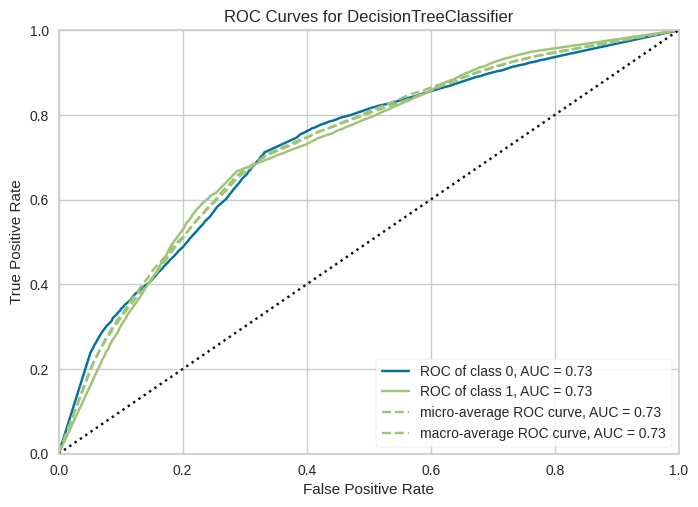

In [ ]:
classification.plot_model(model_dt, plot = 'auc')

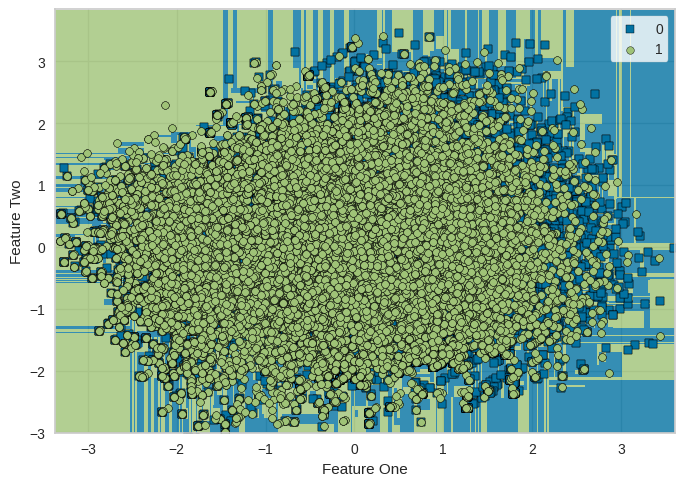

In [ ]:
classification.plot_model(model_dt, plot = 'boundary')

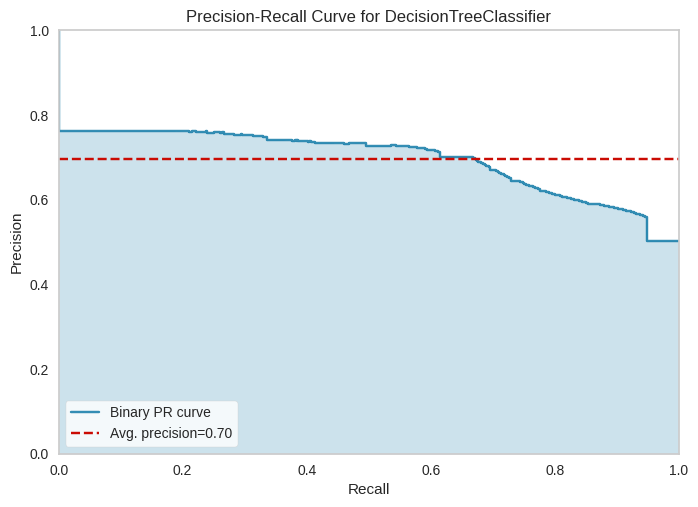

In [ ]:
classification.plot_model(model_dt, plot = 'pr')

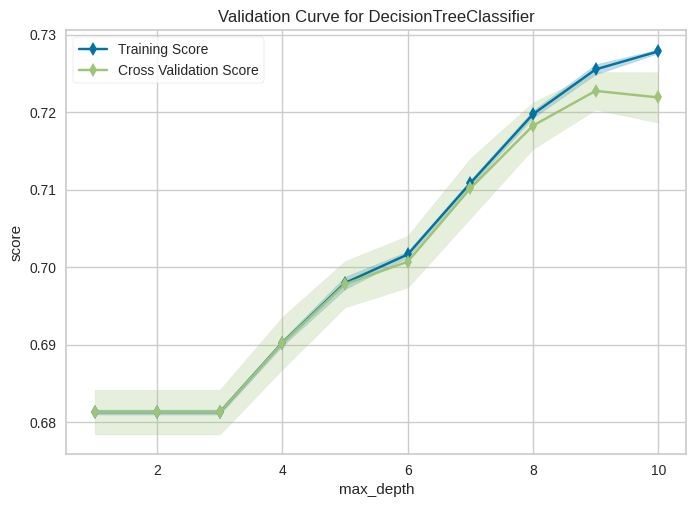

In [ ]:
#Validation Curve
classification.plot_model(model_dt, plot = 'vc')

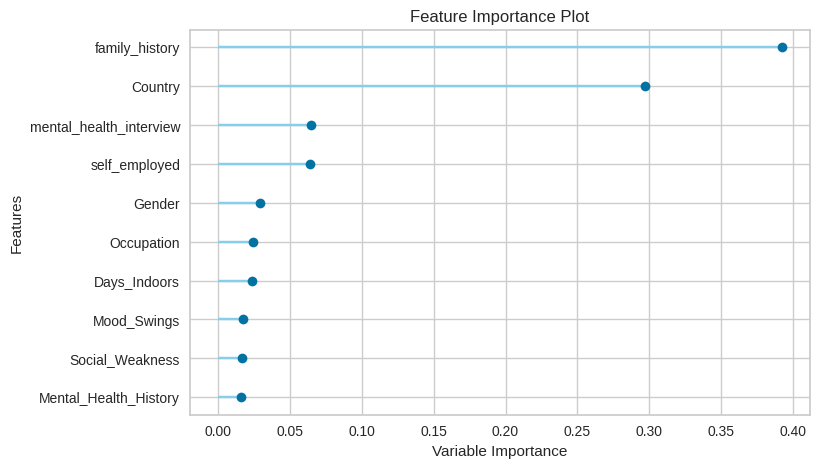

In [ ]:
classification.plot_model(model_dt, plot = 'feature')

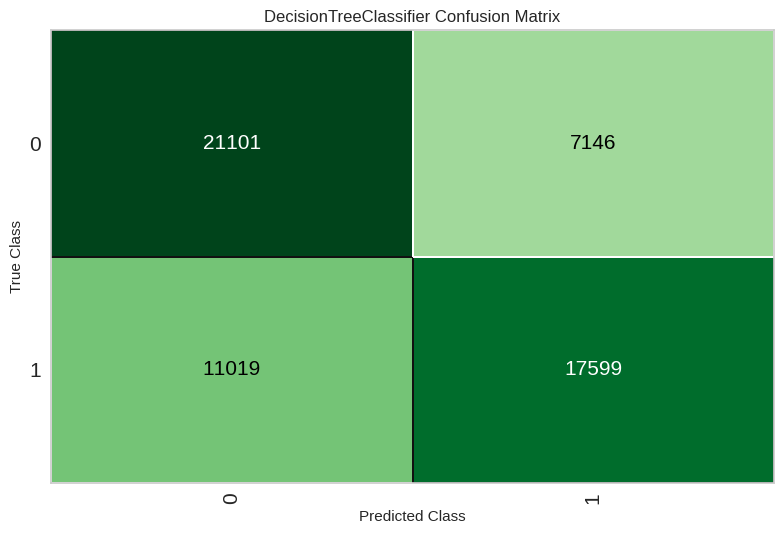

In [ ]:
classification.plot_model(model_dt, plot = 'confusion_matrix')

#LR


In [ ]:
model_lr = classification.create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6840,0.7268,0.6357,0.7069,0.6694,0.3684,0.3703
1,0.6796,0.7268,0.6301,0.7025,0.6644,0.3595,0.3615
2,0.6828,0.7288,0.6240,0.7105,0.6644,0.3661,0.3688
3,0.6858,0.7311,0.6377,0.7087,0.6713,0.3720,0.3739
4,0.6827,0.7282,0.6259,0.7094,0.6650,0.3659,0.3684
5,0.6827,0.7280,0.6308,0.7071,0.6668,0.3658,0.3680
6,0.6818,0.7215,0.6334,0.7045,0.6670,0.3640,0.3659
7,0.6906,0.7352,0.6442,0.7133,0.6769,0.3816,0.3834
8,0.6863,0.7301,0.6365,0.7101,0.6713,0.3730,0.3751


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
model_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3473, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

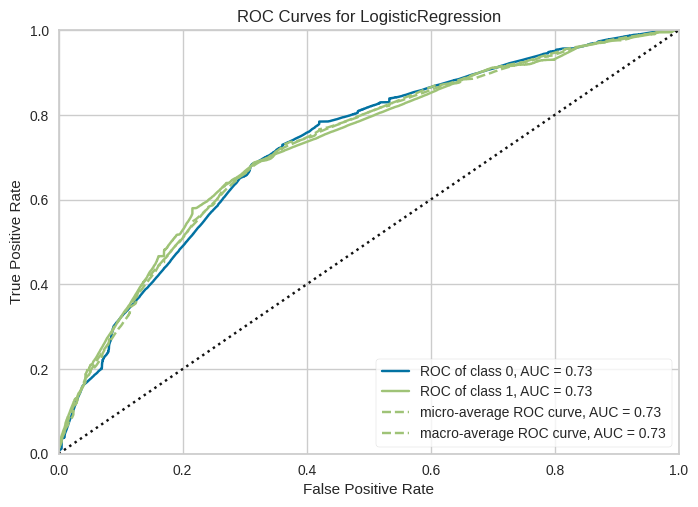

In [ ]:
#AUC-ROC plot
classification.plot_model(model_lr, plot = 'auc')


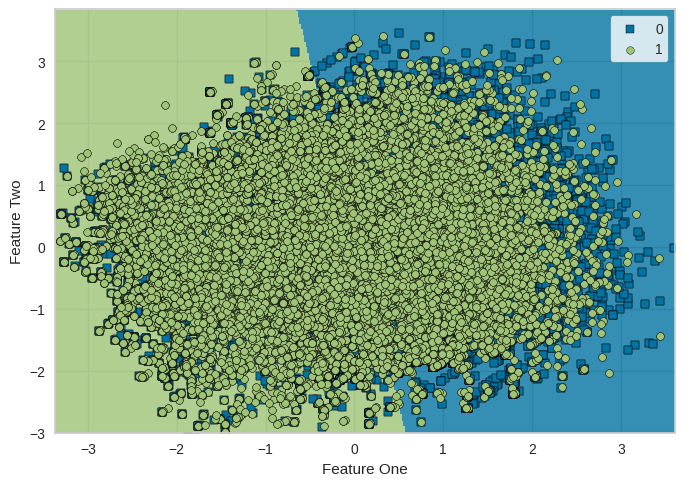

In [ ]:
#Decision boundary
classification.plot_model(model_lr, plot = 'boundary')

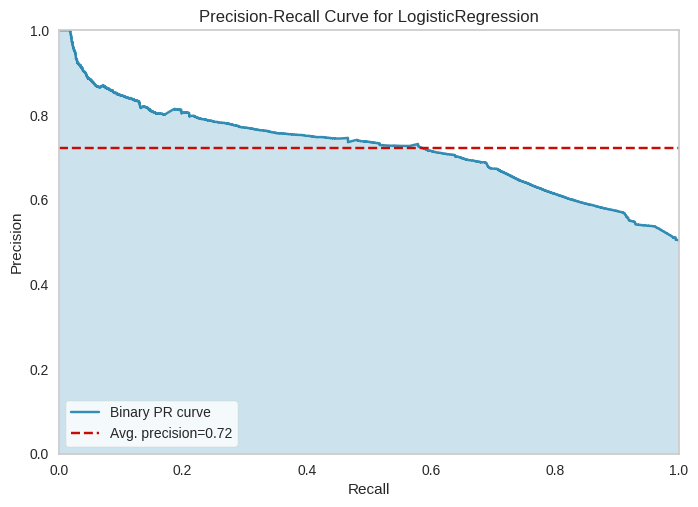

In [ ]:
#Precision-Recall curve
classification.plot_model(model_lr, plot = 'pr')

KeyboardInterrupt: 

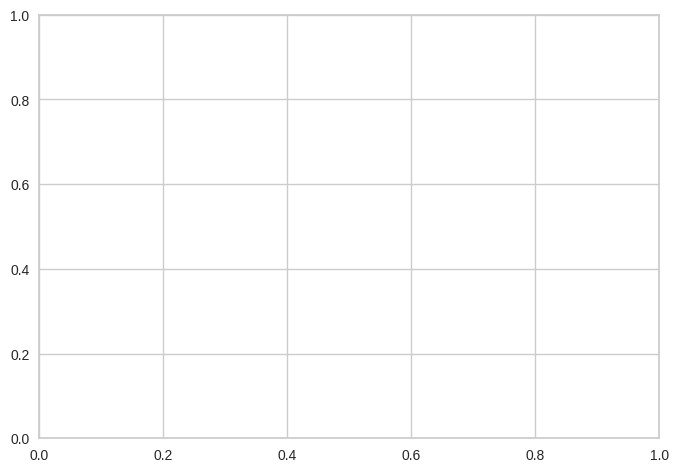

In [ ]:
#Validation Curve
classification.plot_model(model_lr, plot = 'vc')

In [ ]:
#Feature importance plot
classification.plot_model(model_lr, plot = 'feature')

# MLP Model

In [ ]:
# Transform the data
from sklearn.preprocessing import StandardScaler

# Scale the columns to have mean zero and SD 1
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
y_train.value_counts()

In [ ]:
# Study the summary of x_train_scaled

# Convert the array to a dataframe and
# use describe() function to see columnwise stats
x1 = pd.DataFrame(x_train_scaled)
np.round(x1.describe(), 3)

In [ ]:
# Compare the above stats with thsose of the original training data
# This shows you the effect of scaling
x1 = pd.DataFrame(x_train)
np.round(x1.describe(), 3)

In [ ]:
from sklearn.neural_network import MLPClassifier as mlp

In [ ]:
params = {'activation':'tanh', 'solver':'adam', 'valid_frac':0.2,
          'alpha':0.001, 'learn_rate_init':0.0001,
          'max_iter':1000, 'n_iter_no_change':200,
          'rand_state': 3
          }

In [ ]:
# Note: By trial and error we have seen that for this data
#  following are some of the decent configurations for hidden_layer_size
#  along with corresponding validation accuracy
# [16]:73.8%, [16,8]: 77.7%, [8,8]:67%, [8,8,4]: 70.8%

# Initialize the logistic regression model object
mlp_model = mlp(hidden_layer_sizes=([8,8,4]),
                validation_fraction = params['valid_frac'],
                activation = params['activation'],
                solver = params['solver'],
                alpha = params['alpha'],
                learning_rate = "adaptive",
                learning_rate_init = params['learn_rate_init'],
                batch_size = "auto",
                max_iter = params['max_iter'],
                early_stopping = True,
                n_iter_no_change = params['n_iter_no_change'],
                verbose= False,
                random_state = params['rand_state'])

In [ ]:
import warnings
# Train it with training data
with warnings.catch_warnings(record=True) as caught_warnings:
     mlp_model.fit(x_train_scaled, y_train)

In [ ]:
for warn in caught_warnings:
    print(warn)

In [ ]:
# To know what all components are there in the mlp_model object use the following command
dir(mlp_model)

Visualize the learning curve

In [ ]:
from matplotlib import pyplot

# loss_curve_ is available only if the solver is 'adam' or 'sgd'
# for solver = 'lbgs' loss_curve_ component is not generated
training_loss = mlp_model.loss_curve_
validation_score = mlp_model.validation_scores_


pyplot.plot(training_loss, label="Training loss")
pyplot.plot(validation_score, label="Accuracy on Valid. set")
# axis labels
pyplot.xlabel('epochs')
pyplot.ylabel('Training loss')
pyplot.title('Training loss during model training')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
print(f'Max validation score: {round(np.max(validation_score), 3)}')

visualize the model weights

In [ ]:
wts_ip_h1 = np.round(mlp_model.coefs_[0], 2)
wts_h1_h2 = np.round(mlp_model.coefs_[1], 2)
wts_h2_h3 = np.round(mlp_model.coefs_[2], 2)
wts_h3_op = np.round(mlp_model.coefs_[3], 2)

print(f'Shape of weight array between input and hidden layer 1: {wts_ip_h1.shape}')
print(f'Shape of weight array between hidden layers 1 and 2: {wts_h1_h2.shape}')
print(f'Shape of weight array between hidden layers 2 and 3: {wts_h2_h3.shape}')
print(f'Shape of weight array between hidden layers 3 and output layer: {wts_h3_op.shape}')

In [ ]:
# View weights as heatmaps
import matplotlib.pyplot as plt

plt.imshow(wts_ip_h1)
plt.colorbar()
plt.title("Weights between layers : (Input and H1)")
plt.show()

In [ ]:
# Bias terms
print(f'Shape of bias terms at hidden layer 1: {mlp_model.intercepts_[0].shape}')
print(f'Shape of bias terms at hidden layer 2: {mlp_model.intercepts_[1].shape}')
print(f'Shape of bias terms at hidden layer 3: {mlp_model.intercepts_[2].shape}')
print(f'Shape of bias terms at output layer  : {mlp_model.intercepts_[3].shape}')

In [ ]:
# View the values of the bias terms

# Bias terms are of different length
# To see them in a single plot, we need to stack them in a 2D array
# To stack we need arrays of equal length.
# So we pad the arrays of the right with some constant to make them equal length
array_list = []
for i in range(4):
  x = np.round(mlp_model.intercepts_[i], 2)
  if len(x)<16:
    pad_ct = 16-len(x)
    x = np.pad(x, (0,pad_ct), 'constant', constant_values = (-4) )
  array_list.append(x)

#print(array_list)
bias_array = np.stack(array_list, axis=0)
#print(bias_array)

plt.imshow(bias_array)
plt.title("Bias terms")
plt.colorbar()
plt.show()